<a href="https://colab.research.google.com/github/Diba-Dev/marriage-eligibility-and-mohor-prediction/blob/main/MEMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Setup**


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

import warnings
warnings.filterwarnings("ignore")

Google Drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEMV - Pattern Recognition/MEMV.csv")
df = df[df['marry_condition'] != 'nan']

In [ ]:
df.head()

,year,women_age,men_age,family_type,area,girls_job,boys_job,marry_condition,women_status,mohor
0,2013.0,19.0,30.0,rich class,chuadanga,day Labour,businessman,Forced Marriage,Single,387000.0
1,2014.0,22.0,40.0,rich class,Jashore,businessman,businessman,Irrelevant Marriage,Single,391500.0
2,2013.0,16.0,25.0,rich class,Jhenaidah,day Labour,Service holder,Forced Marriage,Single,364500.0
3,2014.0,22.0,34.0,higher class,Khulna,businessman,businessman,arrange Marriage,Single,214200.0
4,2017.0,18.0,29.0,rich class,bagerhat,businessman,Service holder,Forced Marriage,Single,423000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             2433 non-null   float64
 1   women_age        2433 non-null   float64
 2   men_age          2433 non-null   float64
 3   family_type      2433 non-null   object 
 4   area             2433 non-null   object 
 5   girls_job        2433 non-null   object 
 6   boys_job         2433 non-null   object 
 7   marry_condition  2433 non-null   object 
 8   women_status     2433 non-null   object 
 9   mohor            2433 non-null   float64
dtypes: float64(4), object(6)
memory usage: 190.3+ KB


Exploratory Data Analysis and Visualizations

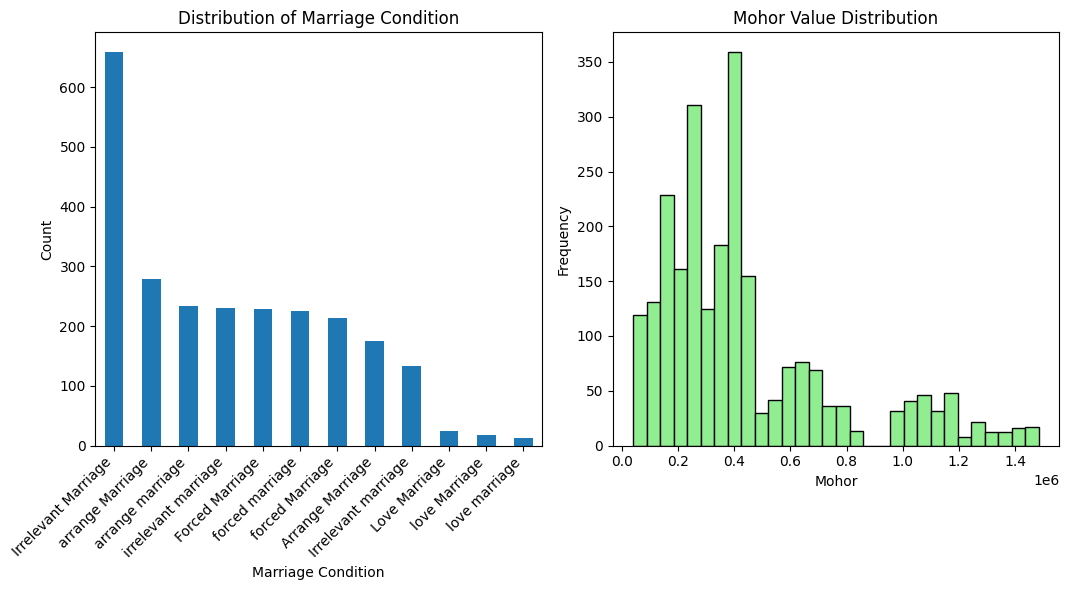

In [ ]:
plt.figure(figsize=(16, 6))

# 1. Distribution of 'marry_condition' CLASSIFICATION
plt.subplot(1, 3, 1)
df['marry_condition'].value_counts().plot(kind='bar')
plt.title("Distribution of Marriage Condition")
plt.xlabel("Marriage Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# 2. Mohor Distribution REGRESSION
plt.subplot(1, 3, 2)
plt.hist(df['mohor'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Mohor Value Distribution")
plt.xlabel("Mohor")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Data Cleaning and Feature Engineering**

In [ ]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip().str.lower()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna("unknown", inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# FEATURE ADD AGE DIFFERENCE
df['age_difference'] = df['men_age'] - df['women_age']

df.head()

,year,women_age,men_age,family_type,area,girls_job,boys_job,marry_condition,women_status,mohor,age_difference
0,2013.0,19.0,30.0,rich class,chuadanga,day labour,businessman,forced marriage,single,387000.0,11.0
1,2014.0,22.0,40.0,rich class,jashore,businessman,businessman,irrelevant marriage,single,391500.0,18.0
2,2013.0,16.0,25.0,rich class,jhenaidah,day labour,service holder,forced marriage,single,364500.0,9.0
3,2014.0,22.0,34.0,higher class,khulna,businessman,businessman,arrange marriage,single,214200.0,12.0
4,2017.0,18.0,29.0,rich class,bagerhat,businessman,service holder,forced marriage,single,423000.0,11.0


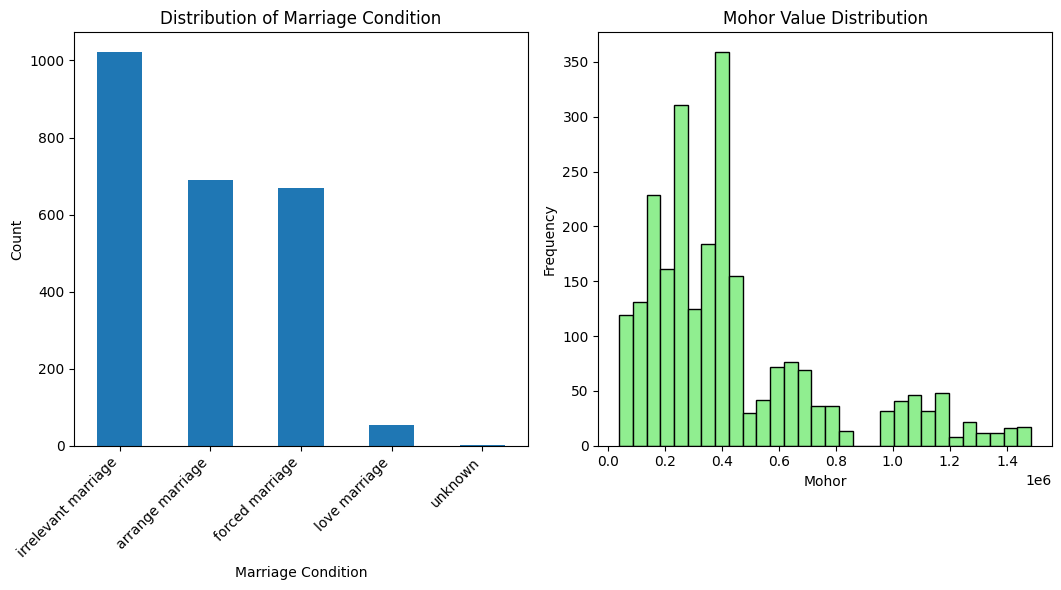

In [ ]:
plt.figure(figsize=(16, 6))

# 1. Distribution of 'marry_condition' CLASSIFICATION
plt.subplot(1, 3, 1)
df['marry_condition'].value_counts().plot(kind='bar')
plt.title("Distribution of Marriage Condition")
plt.xlabel("Marriage Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# 2. Mohor Distribution REGRESSION
plt.subplot(1, 3, 2)
plt.hist(df['mohor'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Mohor Value Distribution")
plt.xlabel("Mohor")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Encoding Categorical Variables**

In [ ]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical columns have been label encoded.")


Categorical columns have been label encoded.


In [ ]:
df.head()

,year,women_age,men_age,family_type,area,girls_job,boys_job,marry_condition,women_status,mohor,age_difference
0,2013.0,19.0,30.0,5,10,1,0,1,1,387000.0,11.0
1,2014.0,22.0,40.0,5,21,0,0,2,1,391500.0,18.0
2,2013.0,16.0,25.0,5,23,1,8,1,1,364500.0,9.0
3,2014.0,22.0,34.0,0,26,0,0,0,1,214200.0,12.0
4,2017.0,18.0,29.0,5,0,0,8,1,1,423000.0,11.0


# **Feature (X) and Target (y) Split**

In [ ]:
# Classification:
X_cls = df.drop(['marry_condition', 'women_status'], axis=1)
y_cls = df['marry_condition']

# Regression:
X_reg = df.drop(['mohor'], axis=1)
y_reg = df['mohor']

print("Feature and target variables for classification (X_cls, y_cls) and regression (X_reg, y_reg) have been created.")

Feature and target variables for classification (X_cls, y_cls) and regression (X_reg, y_reg) have been created.


# **Train-Test Split and Scaling**

In [ ]:
# Classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.20, random_state=42
)

# Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

print("Data has been split into training and testing sets and scaled for both classification and regression tasks.")

Data has been split into training and testing sets and scaled for both classification and regression tasks.


# **Traditional Machine Learning Models (Classification)**

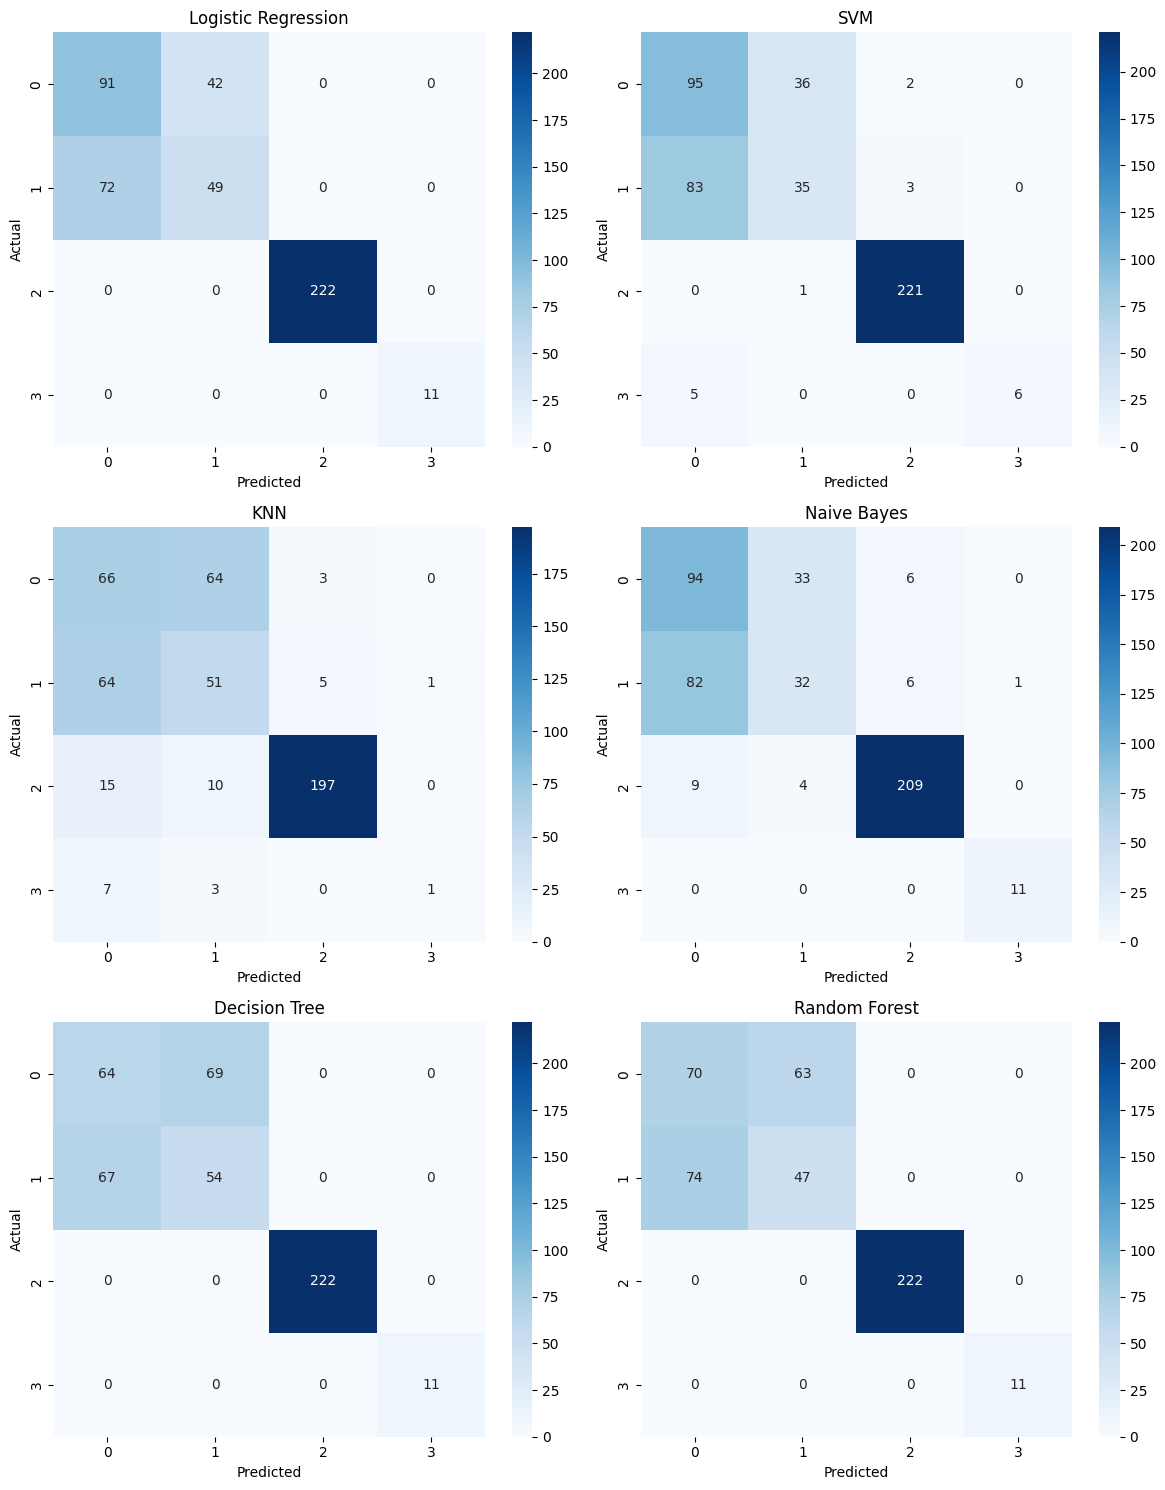

Traditional classification models have been trained, evaluated, and confusion matrices plotted.


In [ ]:
classification_results = []

models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for idx, (name, model) in enumerate(models_cls.items()):
    model.fit(X_train_cls_scaled, y_train_cls)
    preds = model.predict(X_test_cls_scaled)

    acc = accuracy_score(y_test_cls, preds)
    prec = precision_score(y_test_cls, preds, average='weighted')
    rec = recall_score(y_test_cls, preds, average='weighted')
    f1 = f1_score(y_test_cls, preds, average='weighted')

    classification_results.append([name, acc, prec, rec, f1])

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test_cls, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
    axes[idx].set_title(f"{name}")

plt.tight_layout()
plt.show()

print("Traditional classification models have been trained, evaluated, and confusion matrices plotted.")

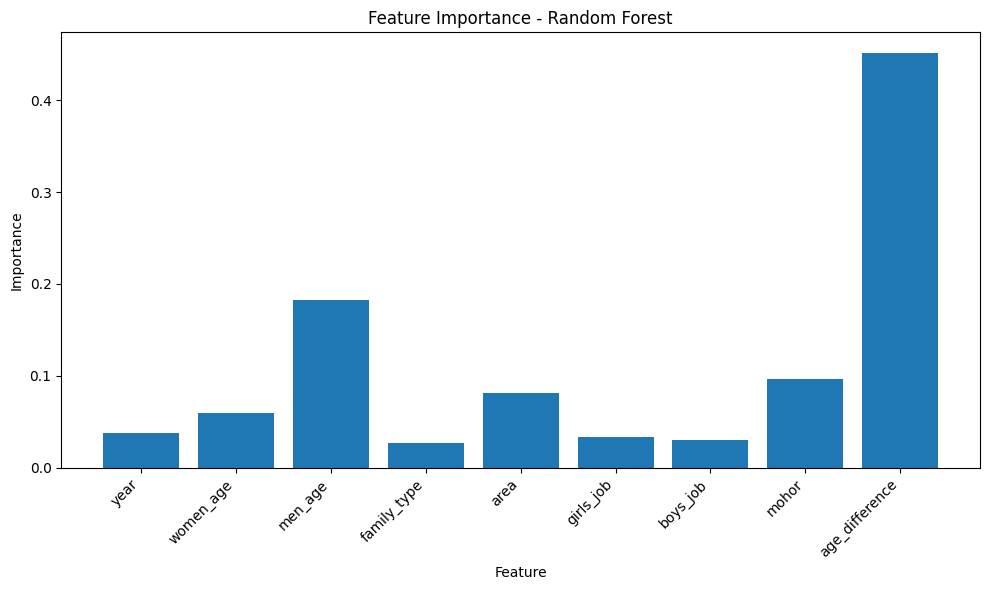

Feature importance plot for Random Forest has been displayed.


In [ ]:
importances = models_cls["Random Forest"].feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(X_cls.columns, importances)
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print("Feature importance plot for Random Forest has been displayed.")

# **ANN — CLASSIFICATION**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',   # Monitor validation loss
                               patience=10,          # Number of epochs with no improvement before stopping
                               restore_best_weights=True,  # Restore the best weights after stopping
                               verbose=1)      # Print progress during training

In [ ]:
num_classes = len(np.unique(y_cls))

ann_cls = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cls_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

ann_cls.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_ann = ann_cls.fit(
    X_train_cls_scaled,
    y_train_cls,
    epochs=80,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

ann_acc = ann_cls.evaluate(X_test_cls_scaled, y_test_cls, verbose=0)[1]

print("ANN classification model has been trained and evaluated.", ann_acc)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3516 - loss: 1.4886 - val_accuracy: 0.5564 - val_loss: 1.1664
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 1.0982 - val_accuracy: 0.6128 - val_loss: 0.8888
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.8321 - val_accuracy: 0.7000 - val_loss: 0.7234
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6808 - loss: 0.7057 - val_accuracy: 0.6974 - val_loss: 0.6292
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7060 - loss: 0.5987 - val_accuracy: 0.6974 - val_loss: 0.5827
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7404 - loss: 0.5353 - val_accuracy: 0.7000 - val_loss: 0.5602
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 0.5316 - val_accuracy: 0.6667 - val_loss: 0.5437
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7122 - loss: 0.5080 - val_accuracy: 0.7077 - val_loss

In [ ]:
ann_cls.summary()

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_280 (Dense)               │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_281 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_282 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_283 (Dense)               │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,001 (39.07 KB)

 Trainable params: 3,333 (13.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,668 (26.05 KB)

In [ ]:
classification_results.append(["ANN", ann_acc, np.nan, np.nan, np.nan])

ANN Training Loss and Accuracy Curves

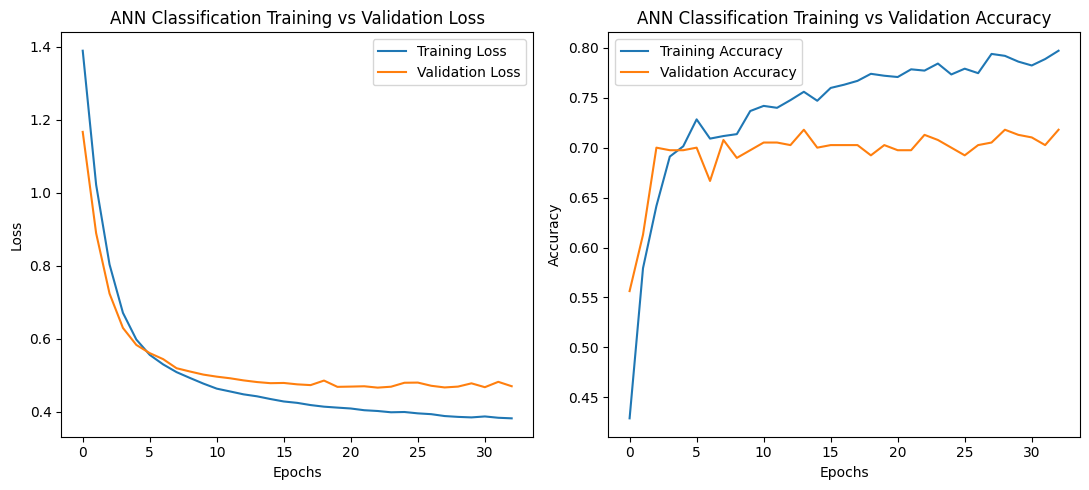

ANN training and validation loss and accuracy curves have been plotted.


In [ ]:
plt.figure(figsize=(11,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Classification Training vs Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Classification Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("ANN training and validation loss and accuracy curves have been plotted.")

ANN CONFUSION MATRIX

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


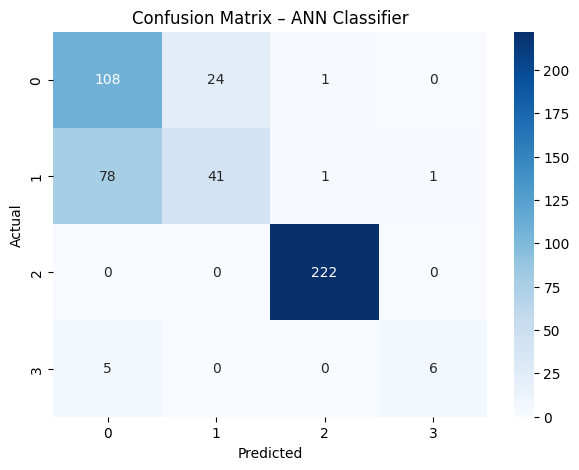

Confusion matrix for the ANN classifier has been plotted.


In [ ]:
ann_probs = ann_cls.predict(X_test_cls_scaled)
ann_preds = np.argmax(ann_probs, axis=1)
cm_ann = confusion_matrix(y_test_cls, ann_preds)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ANN Classifier")
plt.show()

print("Confusion matrix for the ANN classifier has been plotted.")

# **CNN — CLASSIFICATION**

In [ ]:
num_classes = len(np.unique(y_cls))
X_train_cnn = X_train_cls_scaled.reshape(-1, X_train_cls_scaled.shape[1], 1)
X_test_cnn = X_test_cls_scaled.reshape(-1, X_test_cls_scaled.shape[1], 1)

cnn_cls = Sequential([
    Conv1D(64, 3, activation='relu',
           input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_cls.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = cnn_cls.fit(
    X_train_cnn,
    y_train_cls,
    epochs=80,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

cnn_acc = cnn_cls.evaluate(X_test_cnn, y_test_cls, verbose=0)[1]

print("CNN classification model has been trained and evaluated.", cnn_acc)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5066 - loss: 1.2496 - val_accuracy: 0.6692 - val_loss: 0.7385
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6658 - loss: 0.7390 - val_accuracy: 0.6872 - val_loss: 0.6205
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7019 - loss: 0.5789 - val_accuracy: 0.6769 - val_loss: 0.5683
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7059 - loss: 0.5455 - val_accuracy: 0.6846 - val_loss: 0.5403
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7342 - loss: 0.4852 - val_accuracy: 0.6795 - val_loss: 0.5188
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.4560 - val_accuracy: 0.7231 - val_loss: 0.4981
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7295 - loss: 0.4645 - val_accuracy: 0.6821 - val_loss: 0.4961
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7545 - loss: 0.4362 - val_accuracy: 0.7000 - val_loss

In [ ]:
cnn_cls.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 7, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,121 (684.07 KB)

 Trainable params: 58,373 (228.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,748 (456.05 KB)

In [ ]:
classification_results.append(["CNN", cnn_acc, np.nan, np.nan, np.nan])

CNN Training Loss and Accuracy Curves

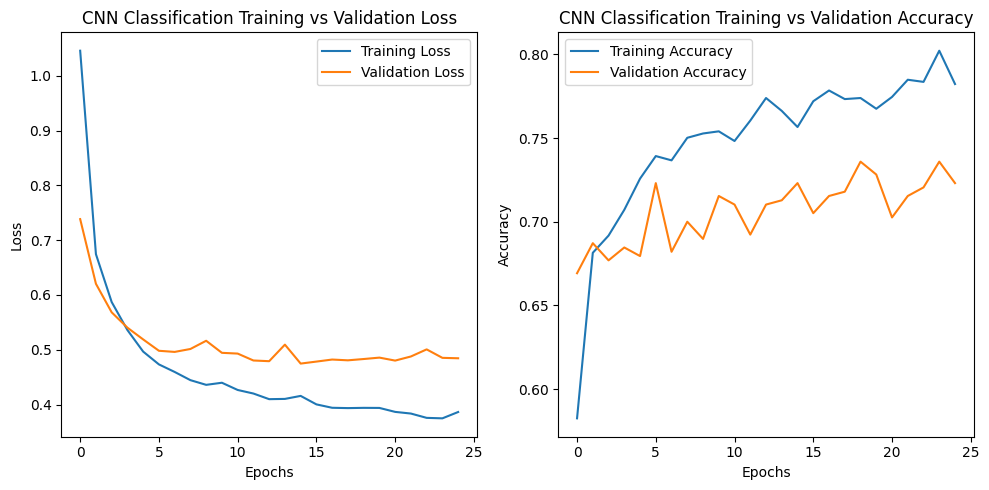

CNN training and validation loss and accuracy curves have been plotted.


In [ ]:
plt.figure(figsize=(10,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Classification Training vs Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Classification Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("CNN training and validation loss and accuracy curves have been plotted.")

CNN CONFUSION MATRIX

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


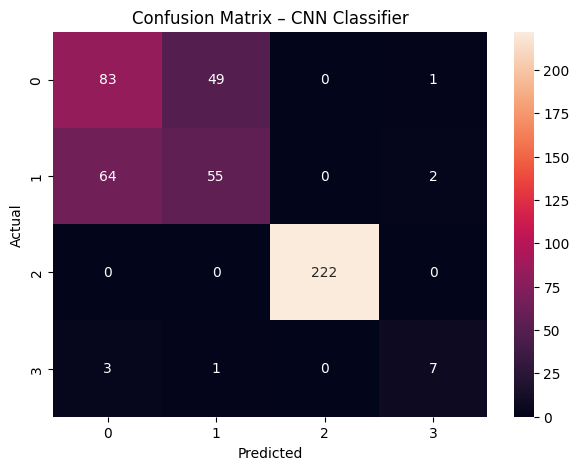

Confusion matrix for the CNN classifier has been plotted.


In [ ]:
cnn_preds = np.argmax(cnn_cls.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test_cls, cnn_preds)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – CNN Classifier")
plt.show()

print("Confusion matrix for the CNN classifier has been plotted.")

# **Visualize Classification Performance and Insights**

In [ ]:
cls_df = pd.DataFrame(
    classification_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)
display(cls_df.sort_values("Accuracy", ascending=False))

In [ ]:
# Classification Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(cls_df['Model'], cls_df['Accuracy'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Classification Model Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


# **Traditional Machine Learning Models (Regression)**

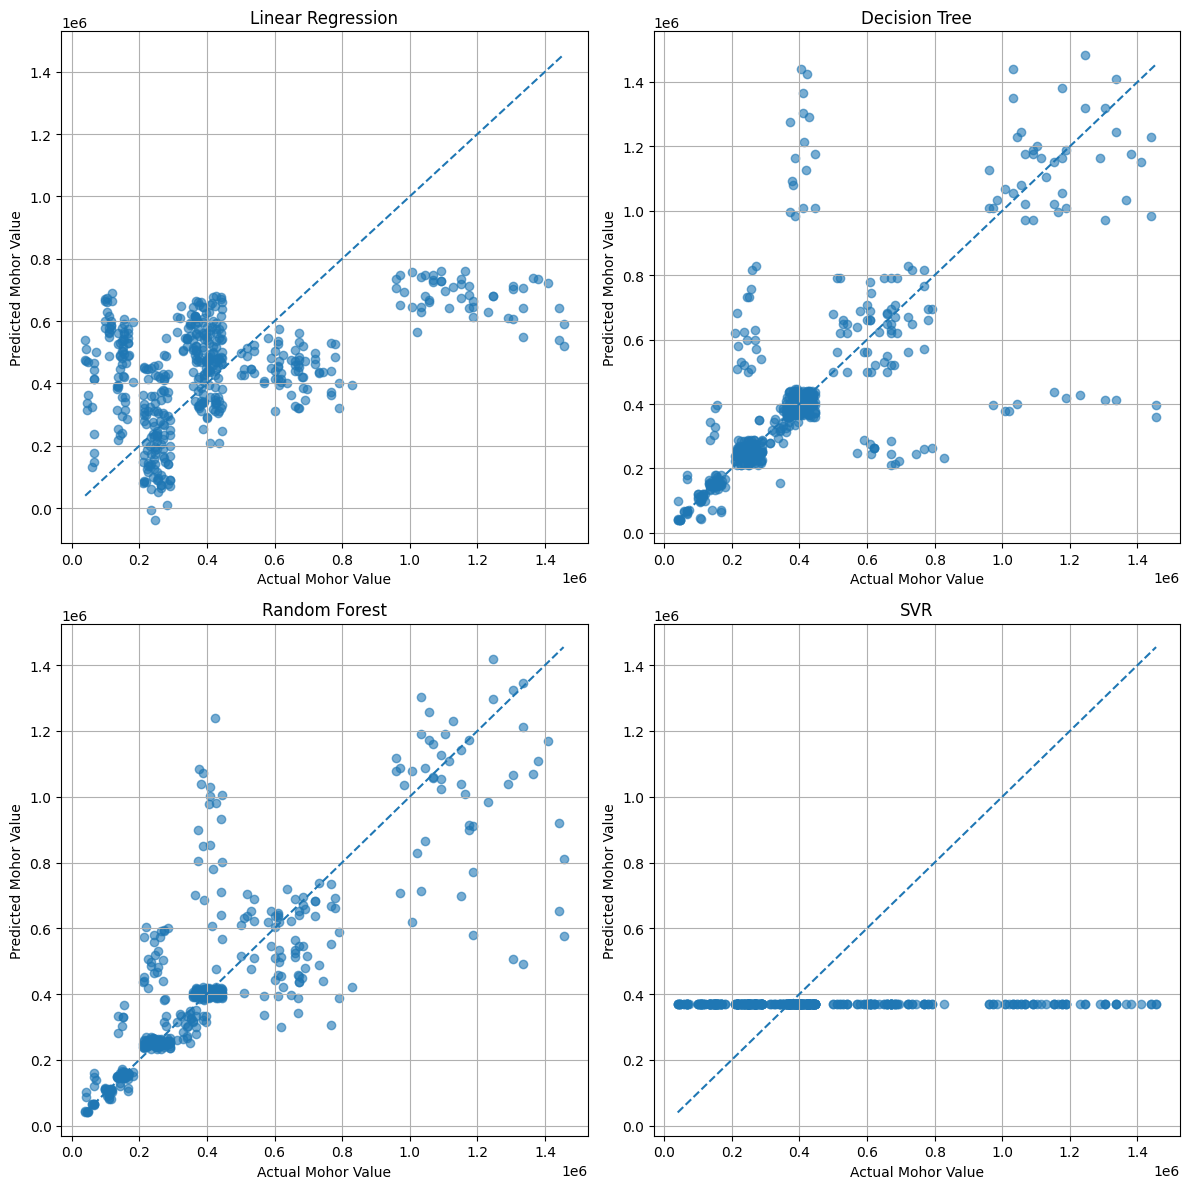

Traditional regression models have been trained and evaluated.


In [ ]:
regression_results = []

models_reg = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()  # flatten to easily iterate

for idx, (name, model) in enumerate(models_reg.items()):
    model.fit(X_train_reg_scaled, y_train_reg)
    preds = model.predict(X_test_reg_scaled)

    mae = mean_absolute_error(y_test_reg, preds)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    r2 = r2_score(y_test_reg, preds)

    regression_results.append([name, mae, rmse, r2])

    # Plot Actual vs Predicted
    y_pred = model.predict(X_test_reg_scaled)
    ax = axes[idx]
    ax.scatter(y_test_reg, y_pred, alpha=0.6)
    ax.plot([y_test_reg.min(), y_test_reg.max()],
            [y_test_reg.min(), y_test_reg.max()],
            linestyle='--')
    ax.set_xlabel("Actual Mohor Value")
    ax.set_ylabel("Predicted Mohor Value")
    ax.set_title(f"{name}")
    ax.grid(True)

plt.tight_layout()
plt.show()

print("Traditional regression models have been trained and evaluated.")

# **ANN — Regression**

In [ ]:
ann_reg = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

ann_reg.compile(optimizer='adam', loss='mse')

history_ann_reg = ann_reg.fit(
    X_train_reg_scaled,
    y_train_reg,
    epochs=80,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

pred_ann = ann_reg.predict(X_test_reg_scaled)

mae_ann = mean_absolute_error(y_test_reg, pred_ann)
print(mae_ann)


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 291954393088.0000 - val_loss: 300350373888.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 305001168896.0000 - val_loss: 300344147968.0000
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 294646579200.0000 - val_loss: 300330942464.0000
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 296984608768.0000 - val_loss: 300305711104.0000
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 280522915840.0000 - val_loss: 300263014400.0000
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 285307863040.0000 - val_loss: 300194430976.0000
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 287211552768.0000 - val_loss: 300093276160.0000
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 278025502720.0000 - val_loss: 299951095808.0000
Epoch 9/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 298554195968.0000 - val_loss: 299761041408.0000
Epoch 10/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

In [ ]:
ann_reg.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,189 (114.02 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,460 (76.02 KB)

In [ ]:
regression_results.append([
    "ANN",
    mean_absolute_error(y_test_reg, pred_ann),
    np.sqrt(mean_squared_error(y_test_reg, pred_ann)),
    r2_score(y_test_reg, pred_ann)
])

ANN Training Loss and Accuracy Curves

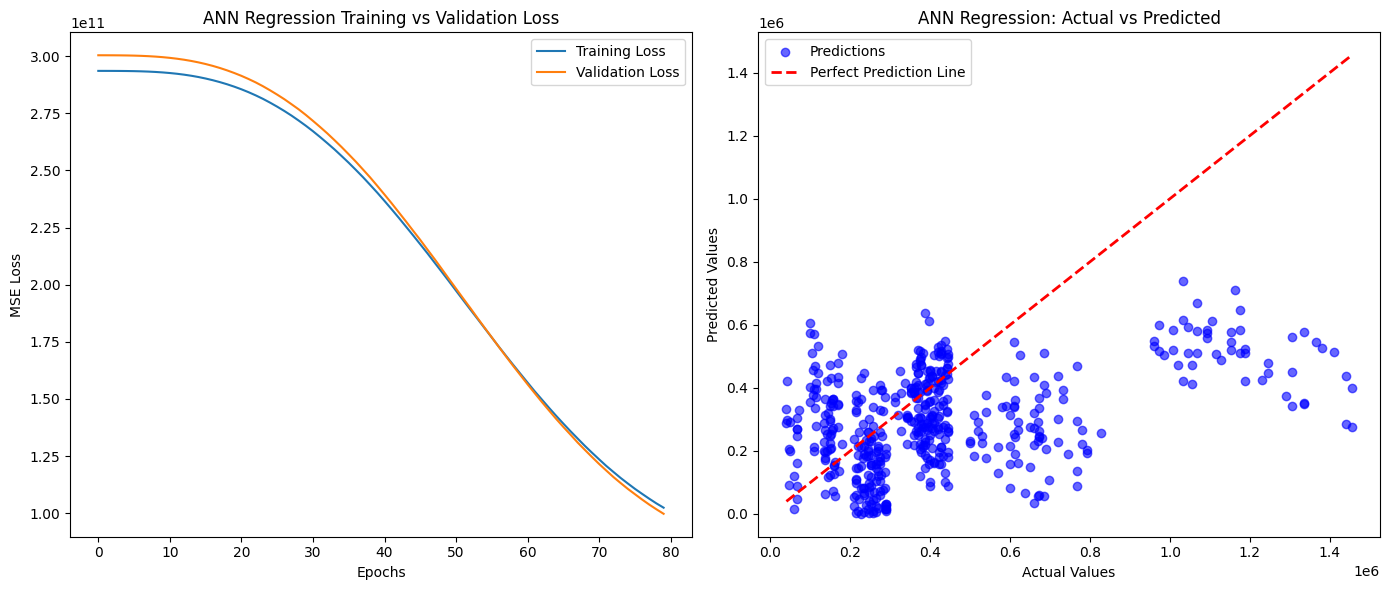

ANN regression training loss curve and actual vs predicted plot have been plotted side by side.


In [ ]:
plt.figure(figsize=(14,6))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history_ann_reg.history['loss'], label='Training Loss')
plt.plot(history_ann_reg.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("ANN Regression Training vs Validation Loss")
plt.legend()

# Actual vs Predicted plot
plt.subplot(1,2,2)
plt.scatter(y_test_reg, pred_ann, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN Regression: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()

print("ANN regression training loss curve and actual vs predicted plot have been plotted side by side.")


# **CNN — Regression**

In [ ]:
X_train_cnn_reg = X_train_reg_scaled.reshape(-1, X_train_reg_scaled.shape[1], 1)
X_test_cnn_reg = X_test_reg_scaled.reshape(-1, X_test_reg_scaled.shape[1], 1)

cnn_reg = Sequential([
    Conv1D(32, 3, activation='relu',
           input_shape=(X_train_cnn_reg.shape[1],1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

cnn_reg.compile(optimizer='adam', loss='mse')

history_cnn_reg = cnn_reg.fit(
    X_train_reg_scaled,
    y_train_reg,
    epochs=80,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

pred_cnn = cnn_reg.predict(X_test_cnn_reg)

regression_results.append([
    "CNN",
    mean_absolute_error(y_test_reg, pred_cnn),
    np.sqrt(mean_squared_error(y_test_reg, pred_cnn)),
    r2_score(y_test_reg, pred_cnn)
])

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 296362999808.0000 - val_loss: 300348637184.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 269536444416.0000 - val_loss: 300338053120.0000
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 303489548288.0000 - val_loss: 300316393472.0000
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 286599446528.0000 - val_loss: 300277497856.0000
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 297219096576.0000 - val_loss: 300213633024.0000
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 291440361472.0000 - val_loss: 300118179840.0000
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 297032679424.0000 - val_loss: 299981996032.0000
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 302823964672.0000 - val_loss: 299798265856.0000
Epoch 9/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 277443936256.0000 - val_loss: 299560239104.0000
Epoch 10/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

CNN Training Loss and Accuracy Curves

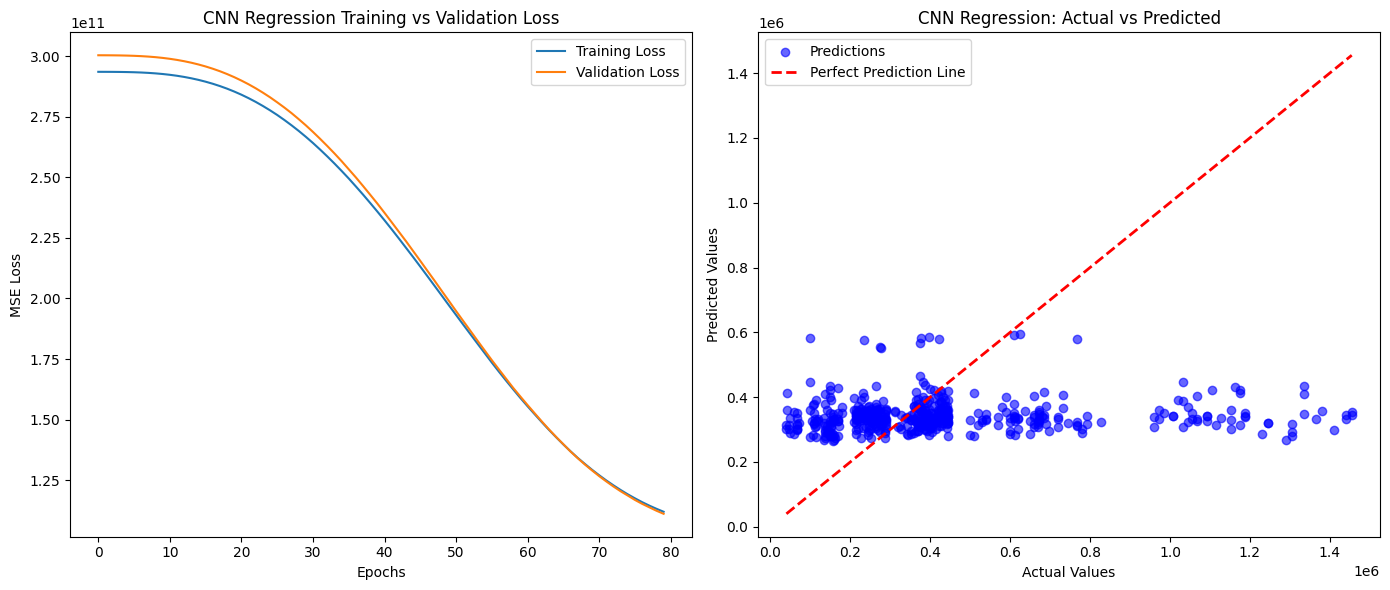

CNN regression training loss curve and actual vs predicted plot have been plotted side by side.


In [ ]:
plt.figure(figsize=(14,6))

# Loss
plt.subplot(1,2,1)
plt.plot(history_cnn_reg.history['loss'], label='Training Loss')
plt.plot(history_cnn_reg.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("CNN Regression Training vs Validation Loss")
plt.legend()

# Actual vs Predicted
plt.subplot(1,2,2)
plt.scatter(y_test_reg, pred_cnn, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("CNN Regression: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()

print("CNN regression training loss curve and actual vs predicted plot have been plotted side by side.")


# **Visualize Regression Performance and Insights**

In [ ]:
reg_df = pd.DataFrame(
    regression_results,
    columns=["Model", "MAE", "RMSE", "R2"]
)

display(reg_df.sort_values("RMSE"))


,Model,MAE,RMSE,R2
2,Random Forest,95585.318275,177399.011702,0.658494
1,Decision Tree,113263.039014,229766.027811,0.427114
0,Linear Regression,212226.580738,268905.869702,0.215312
4,ANN,222636.643708,306211.590747,-0.017512
3,SVR,206464.931727,310055.663550,-0.043219
5,CNN,209391.189682,317381.866507,-0.093102


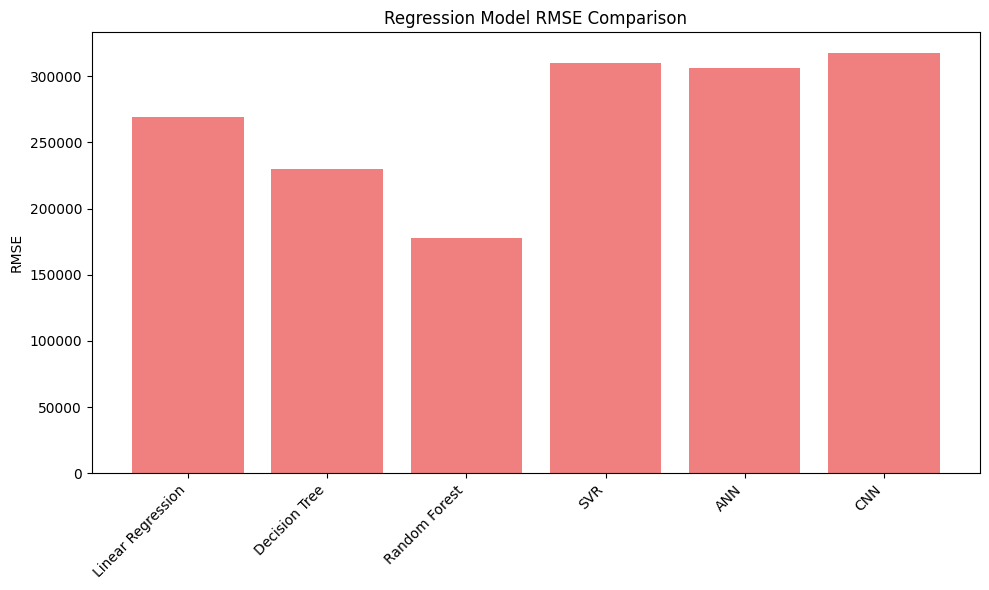

In [ ]:
# Regression Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(reg_df['Model'], reg_df['RMSE'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.title('Regression Model RMSE Comparison')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()